# Variadic Function
A function that takes variable number of arguments

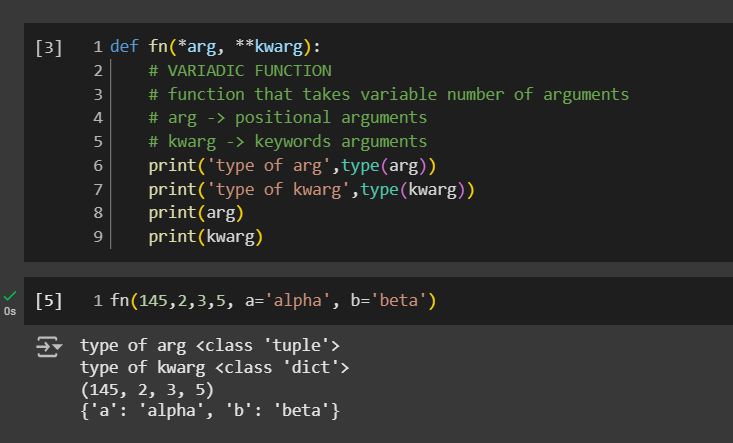

# Higher order function
A function is called Higher Order Function if it contains other functions as a parameter or returns a function as an output

In [ ]:
from typing import Callable
def double(operation : Callable[[int,int],int]):
    '''
    This function takes a function as an argument
    It has a wrapper function inside it, which doubles the output of the arguement function
    Return: reference of wrapper function
    '''
    def wrapper(*arg):
        '''
        This is a variadic function.
        returns the double of the output of the argument function
        '''
        return operation(*arg)*2
    return wrapper

In [ ]:
double

<function __main__.double(operation: Callable[[int, int], int])>

In [ ]:
def add(a: int, b: int):
    '''
    take two numbers as input and return their sum.
    '''
    return a+b

def substract(a: int, b: int):
    '''
    take two numbers as input and return absolute value of difference.
    '''
    return abs(a-b)

In [ ]:
double_add = double(add)
double_substract = double(substract)

In [ ]:
double_add

<function __main__.double.<locals>.wrapper(*arg)>

In [ ]:
print('Double the sum of two number')
print(double_add(1,2))
print()

print('Double the difference of two number')
print(double_substract(1,2))


Double the sum of two number
6

Double the difference of two number
2


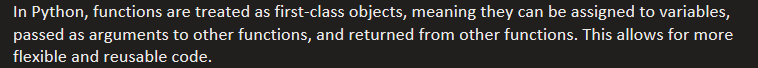

# Closure
A closure in Python is a function object that retains access to variables from its enclosing scope, even after the outer function has finished executing. This allows the inner function to remember and access these variables, providing a way to maintain state across function calls.

In [ ]:
def outer(x: int):
    def inner(y: int):
        '''
        This is an nested function, takes values from parent function.
        For each value of x in parent function, a new state of inner function can be created
        '''
        return x + y
    return inner

In [ ]:
closure = outer(5)
type(closure)

function

In [ ]:
closure

<function __main__.outer.<locals>.inner(y: int)>

In [ ]:
closure(2)

7


### Example 1


In [ ]:
def make_multiplier(base: int):
    def multiplier(index : int):
        return base * index
    return multiplier

In [ ]:
print('Multile of two is created using closure:')
times_two = make_multiplier(2)
print(times_two(1), times_two(2), times_two(3), times_two(4), end = '\n\n')

print('Multile of three is created using closure:')
times_three = make_multiplier(3)
print(times_three(1), times_three(2), times_three(3), times_three(4))

Multile of two is created using closure:
2 4 6 8

Multile of three is created using closure:
3 6 9 12


### Example 2

In [ ]:
def create_counter():
    '''
    Starts a new counter everytime it is invoked/ called
    '''
    count = [0]
    # This count variable has to be a mutable type
    # wrapper function has access to it as a global variable but can not modify it
    # but wrapper function needs update 'count' in order to keep track of last value
    # mutable type object helps nested wrapper function to access and modify its element
    def wrapper():
        '''
        keeps track of last value of count and returns the next value.
        '''
        count[0]+=1
        return count[0]
    return wrapper

In [ ]:
counter1  = create_counter()
counter2  = create_counter()

In [ ]:
print('1st call counter1: ',counter1())
print('2nd call counter1: ',counter1())
print('1st call counter2: ',counter2())
print('3rd call counter1: ',counter1())
print('2nd call counter2: ',counter2())

1st call counter1:  1
2nd call counter1:  2
1st call counter2:  1
3rd call counter1:  3
2nd call counter2:  2


# Decorators

In [ ]:
def function():
    return 'Hello world from primary fucntion'

function()

'Hello world from primary fucntion'

In [ ]:
from typing import Callable

def decor(fun : Callable):
    '''
    This is Higher order function that will be used as decorators.
    '''
    def wrapper():
        print('Hello world from decorator') # where logic of the decorators will be executed
        return fun()
    return wrapper

@decor
def function():
    '''
    This is function with 'decor' decorator.
    '''
    return 'Hello world from primary fucntion'

In [ ]:
function

<function __main__.decor.<locals>.wrapper()>

Here, inner wrapper function is refered.

In [ ]:
function()

Hello world from decorator


'Hello world from primary fucntion'

In [ ]:
## Using HOF as decorators without '@' sign

def function():
    return 'Hello world from primary fucntion'

func2 = decor(function)

func2

<function __main__.decor.<locals>.wrapper()>

Here, inner wrapper function is refered.

In [ ]:
function()

Hello world from decorator


'Hello world from primary fucntion'

### Retain the function metadata with decorators

In [4]:
from functools import wraps
from typing import Callable

def decor(fun : Callable):
    '''
    This is Higher order function that will be used as decorators.
    '''
    @wraps(fun)
    def wrapper():
        print('Hello world from decorator') # where logic of the decorators will be executed
        return fun()
    return wrapper

@decor
def function():
    '''
    This is function with 'decor' decorator.
    '''
    return 'Hello world from primary fucntion'

In [5]:
function
# here function retains all __name__. __doc__, __module__, __annotations__ (assignements) of the original fucntion

<function __main__.function()>

### Example 1

In [ ]:
# WRITE A WRAPPER FUCNTION THAT PRINTS ARGUMENTS AND RESULT OF ANY FUNCTION.

from typing import Callable, Any

def logger(func: Callable[..., Any]) -> Callable[..., Any]:
    """
    Logs the function name, arguments, and return value.

    This decorator logs the function name, arguments, and return value
    to the console. It can be used to debug or monitor the execution
    of functions.

    Args:
        func: The function to be decorated.

    Returns:
        The decorated function.
    """
    def wrapper(*arg, **kwarg):
        function_output = func(*arg, **kwarg)
        print(f"Calling function: '{func.__name__} ' with arguments: {arg} {kwarg}")
        print(f"Function '{func.__name__}' returned: {function_output} ")
        return function_output
    return wrapper

@logger
def sum(a,b):
    return a+b


In [ ]:
sum(1,6)

Calling function: 'sum ' with arguments: (1, 6) {}
Function 'sum' returned: 7 


7

### Example 2

In [ ]:
# A WRAPPER THAT REPEATS ANY FUNCTION TWICE

from random import randint
def repeat(func: Callable[..., Any]) -> Callable[...,Any]:
    '''
    This is a decorators that invokes argument function twice.
    '''
    def wrapper(*arg, **kwarg) -> None:
        func(*arg, **kwarg)
        func(*arg, **kwarg)
    return wrapper

@repeat
def lotto(min:int,
          max:int) -> str:

    print('Randomly drawn number: ',randint(min, max))

In [ ]:
lotto(1,5)

Randomly drawn number:  4
Randomly drawn number:  2


### Example 3

In [ ]:
# WRITE A WRAPPER THAT TAKES ANY FUNCTION AND RETURNS THE TOTAL TIME IT TAKES TO RUN

In [12]:
import time
from typing import Callable, Any

def time_counter(func: Callable[..., Any]) -> Callable[..., Any]:
    """
    calculates the runnig time of a function

    Args:
        func: The function to be decorated.

    Returns:
        The decorated function.
    """
    def wrapper(*arg, **kwarg):
        start = time.perf_counter()
        function_output = func(*arg, **kwarg)
        end = time.perf_counter()
        print(f"Calling function: '{func.__name__} ' with arguments: {arg} {kwarg}")
        print(f"Function '{func.__name__}' returned: {function_output} ")
        print(f"Function '{func.__name__}' took {end-start} seconds to run")
        return function_output
    return wrapper

@time_counter
def sum(a,b):
    return a+b

In [11]:
sum(3324234,234523)

Calling function: 'sum ' with arguments: (3324234, 234523) {}
Function 'sum' returned: 779609330382 
Function 'sum' took 1.2429998150764732e-06 seconds to run


779609330382

## Decorator with argument

In [ ]:
# A WRAPPER THAT REPEATS ANY FUNCTION n NUMBER OF TIME

from random import randint


def repeat_n(n: int): # This  function adds extra layer of wrap to introduct argument to Decorators

    def repeat(func: Callable[..., Any]) -> Callable[...,Any]: #This is a decorator wrap.

        def wrapper(*arg, **kwarg) -> None: #Here, actual logic of the decorator is written.

            for i in range(n):
                func(*arg, **kwarg)
        return wrapper
    return repeat

@repeat_n(3)
def lotto(min:int,
          max:int) -> str:

    print('Randomly drawn number: ',randint(min, max))

In [ ]:
lotto(2,7)

Randomly drawn number:  4
Randomly drawn number:  3
Randomly drawn number:  5


## Chain of Decorators

In [ ]:
def decorator1(fun):
    def wrapper():
        print('Decorator 1')
        fun()
    return wrapper

def decorator2(fun):
    def wrapper():
        print('Decorator 2')
        fun()
    return wrapper

@decorator1
@decorator2
def function():
    print('function.')

In [ ]:
function()

Decorator 1
Decorator 2
function.


#Example
 > <font size="4">define a function 'get_weather(city)' that simulates the retrieval of weather data for a given city. For simplicity, the function will return a dictionary containing random values for temperature (range from -10 to 30) and humidity (range from 0 to 100). Use a delay  of 1 second to mimic the real-time delay of calling a live API</font>

> <font size="4">then define a decorator 'cache_decorator(func)' that checks if the requested city's weather data is already in the cache AND it isn't too old (i.e. less than 10 seconds old). If the data meets both conditions, the decorator should return a value from cache rather than allow the invocation of the target function</font>

> <font size="4">if the weather data for the city is not in the cache or it's too old, the 'get_weather(city)' invocation should be allowed to get and return fresh data. In addition, the cacheshould be updated with the new data</font>

> <font size="4">for simplicity, implement the weather data cache for each city as a dictionary</font>


In [14]:
import time
from random import randint
from functools import wraps

# cache = {
#     "city1": {
#         "data": **weather**,
#         "time": 12312312
#     },
#     "city2": {},
#     "city3": {},
# }

cache = {}

# - introduce some cache/memory
# - before invocation, check cache

def cache_decorator(func):
  @wraps(func)
  def wrapper(city):

    if city in cache and time.time() - cache[city]['time'] < 10:
      print(f"Returning cached result for {city}...")
      return cache[city]['data']

    result = func(city)
    cache[city] = {
        "data": result,
        "time": time.time()
    }

    return result
  return wrapper


@cache_decorator
def get_weather(city):
  print(f"Fetching weather data for {city}...")
  time.sleep(1)

  weather_data = {
      'temperature': randint(-10, 30),
      'humidity': randint(0, 100)
  }

  return weather_data

In [18]:
print(time.time())
get_weather("Toronto")

1734812847.1851006
Fetching weather data for Toronto...


{'temperature': 4, 'humidity': 30}

In [20]:
print(time.time())
get_weather("Toronto")

1734812872.4797294
Fetching weather data for Toronto...


{'temperature': 30, 'humidity': 67}

In [21]:
print(time.time())
get_weather("Toronto")

1734812876.5004048
Returning cached result for Toronto...


{'temperature': 30, 'humidity': 67}